# Repo Radar | FOSS Analytics

In [5]:
import pandas as pd
import plotly as ply
import plotly.subplots as plys
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime
from IPython.display import Image

In [2]:
data = pd.read_csv('repo_data_clean.csv', sep=';')
data[['created_at', 'updated_at', 'pushed_at']] = data[['created_at', 'updated_at', 'pushed_at']].map(lambda x: datetime.strptime(x[:10], '%Y-%m-%d').year)
data.iloc[:,-9:-3] = data.iloc[:,-9:-3].map(lambda x: x.split('//') if isinstance(x,str) else x)

## The industry standard

GitHub has become the heart of open-source software (OSS) development, hosting millions of projects that power modern technology. But how has open source evolved on GitHub over the years? Let’s explore the trends, growth, and impact of OSS through data.

### The Rise of Github

GitHub was founded in 2008, and since then, it has grown exponentially:  
- [**2010**](https://github.blog/news-insights/one-million-repositories/): ~1M repositories  
- **2015**: ~20M repositories
- [**2023**](https://octoverse.github.com/2023): **Over 420M repositories** (with ~28M public ones)

## Open-source adoption has skyrocketed

For our analysis we have scrapped the top 1000 open source repositories with the most stars and forks, obviously there is a lot of overlap in these areas and we ended up with a total of 1505 repositories to analyze.

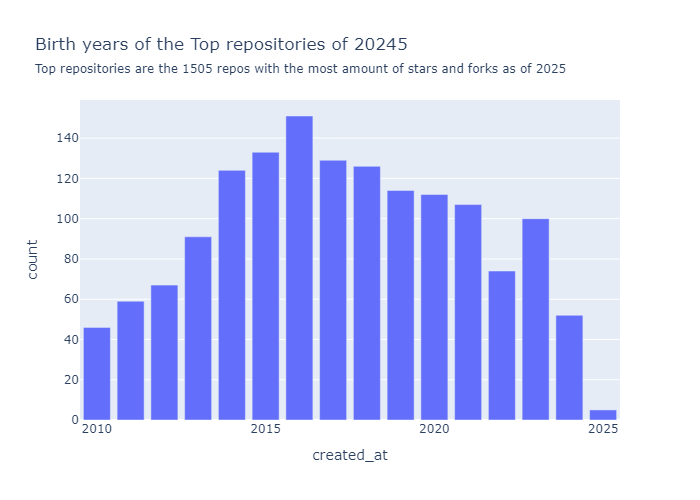

In [6]:
date_data = data.value_counts('created_at').sort_index().reset_index()
fig = px.bar(date_data[(date_data['created_at'] >= 2010) & (date_data['created_at'] <=2025)],
    x='created_at',
    y='count',
    title='Birth years of the Top repositories of 20245',
    subtitle='Top repositories are the 1505 repos with the most amount of stars and forks as of 2025'
)
fig.show()
fig.write_image("repos_by_year.png")
Image("repos_by_year.png")

### Notice the bump around 2016?
2016 was a year of many changes for the open source community characterized by:
- The requirement from many schools and universities to use GitHub for student projects in STEM fields.
- A cultural shift in the developer world towards open source software.
  - Developers began treating their GitHub profiles like LinkedIn profiles. Stars became social proof, and "GitHub famous" became a real phenomenon. The most-starred repository? That would be freeCodeCamp's curriculum, with over 400,000 stars—a testament to coding education's mass appeal.
- The adoption of open source software from big tech companies like Microsoft, Google, Facebook, IBM. 
  - Companies realized that open-sourcing tools could drive adoption, attract talent, and improve software quality through community contributions.
  - Projects like Kubernetes (Google, 2014) and React (Facebook, 2013) were gaining training on the octocat platform.

This led to an inmense growth in open source project in this year making those repositories stand out in terms of stars and forks which are the metrics we chose to analyze.

## The Battle of Languages. What developers loved ... and what they hated

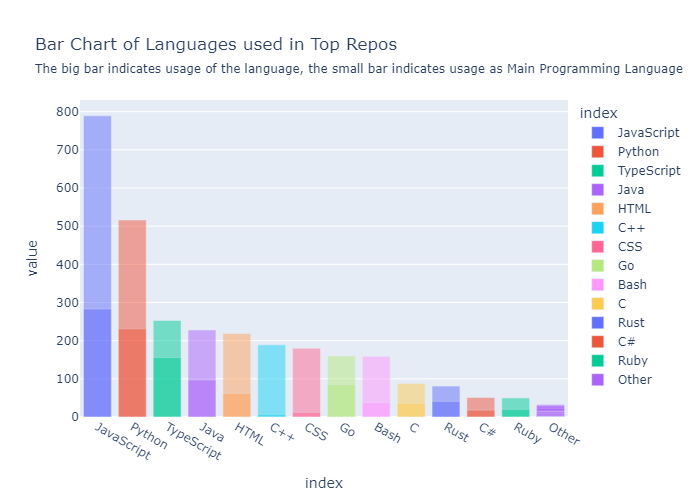

In [13]:
lang_data = pd.merge(
                pd.merge(data.explode('Programming Languages used').value_counts('Programming Languages used'),
                        data.explode('Programming Languages used').value_counts('Programming Languages used', normalize=True),
                        left_index=True, right_index=True
                    ),
                pd.merge(data.explode('Main Programming Language').value_counts('Main Programming Language'),
                     data.explode('Main Programming Language').value_counts('Main Programming Language', normalize=True),
                     left_index=True, right_index=True
                     ),
                     left_index=True, right_index=True).reset_index()

lang_data['index'] = lang_data.apply(lambda x: 'Other' if x['count_x'] < 50 else x['index'],axis=1)

fig1 = px.bar(lang_data,
       x='index',
       y=['count_x', 'count_y'],
       barmode='overlay',
       color='index',
       title='Bar Chart of Languages used in Top Repos',
       subtitle='The big bar indicates usage of the language, the small bar indicates usage as Main Programming Language'
       )

fig2 = px.pie(lang_data,
              names='index',
              values='count_x',
              title='Pie Chart of Language usage',
              
              )
fig1
fig1.write_image("plot.png")
Image("plot.png")

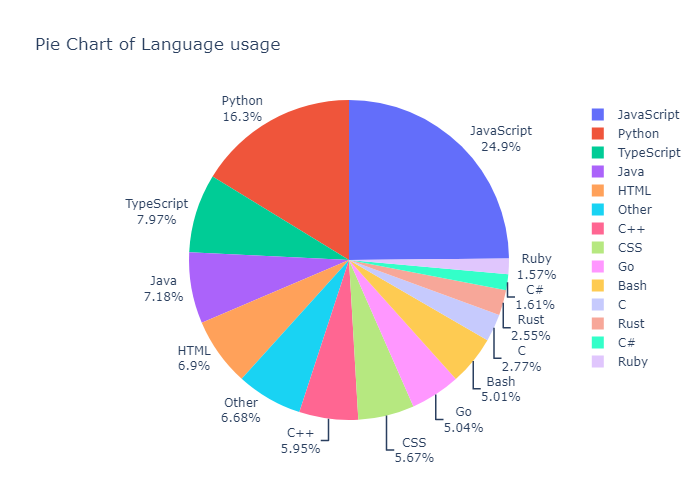

In [14]:
fig2.update_traces(textposition='outside', 
                 textinfo='percent+label')
fig2
fig2.write_image("pie.png")
Image("pie.png")

#### JavaScript's Unshakable Throne
With 28% of top repositories, JavaScript remains king. The web boom (React, Vue, Node.js) made it unavoidable. Even as critics called it messy, its flexibility won out.

#### Python's Silent Coup
Machine learning propelled Python from scripting language to powerhouse. Libraries like TensorFlow (Google) and PyTorch (Facebook) turned Python into AI's lingua franca.

### The Corporate Challengers

TypeScript (Microsoft): Brought structure to JavaScript

Go (Google): Became the cloud's favorite language

Rust (Mozilla): Promised safety without sacrifice

### The Fallen
Remember Perl? Ruby? Their decline in our dataset mirrors industry trends—a reminder that no language stays on top forever.

### Stars vs. Forks: The Two Faces of Success
Not all popularity is equal. Our graphsreveals fascinating divides:

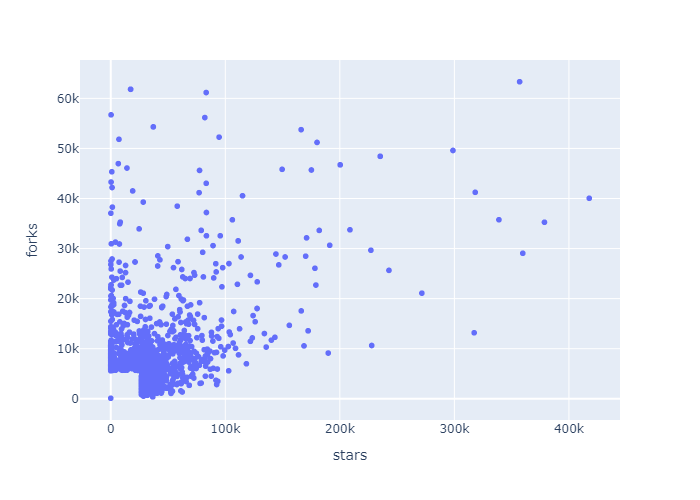

In [15]:
px.scatter(data, x='stars', y='forks').write_image("scatter_plot.png")
Image("scatter_plot.png")

## Conclusion: What the Data Tells Us About Tomorrow
Three insights emerge:

Open source won
It's no longer alternative—it's default. Even proprietary companies now embrace open core models.

The rules have changed
Individual maintainers struggle against corporate-backed projects with full-time teams.

The next battle is sustainability
As open source becomes infrastructure, questions about funding and maintenance grow louder.

The story continues to unfold. One thing remains certain: GitHub's data will be there to document it. What chapter will we write next?

